## MECH 383 - Applied Electronics and Instrumentation

## Lab Information and Rules

1. All team members must be present for labs. Absences or time changes from scheduled labs need to be pre-arranged for valid reasons. 

2. It is strongly recommended to complete pre-labs before your experiment time. Pre-labs are handed in together with the experiment and lab report. 

3. Lab report due dates and late policy are given on the course syllabus. 

4. If your submission relies on additional files to run correctly, it is the responsibility of the student to ensure that all files are included with the submission and named correctly.

5. Labs are graded based on the output of each code block. Code that throws errors, supresses output, or otherwise results in **no printed output may not receieve points**.

6. Each lab will be handed in on behalf of the group by one group member.

**HINT**: To help ensure your notebook runs as expected, restart the kernel and re-run each cell sequentially.

In [164]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.rcParams["font.family"] = "Times New Roman"

The following websites can be used as resources:

* https://www.python.org/
* https://numpy.org/
* https://matplotlib.org/


# MECH 383 - Lab 3

© Instructor-generated course materials (e.g., handouts, notes, summaries, exam questions, etc.) are protected by law and may not be copied or distributed in any form or in any medium without explicit permission of the instructor. 

##### Group Number:                
<br>Names: Stephen Chang, Zhi Ji Li, Simon Vaillant
<br>
<br> Collaborators:
<br>
<br> Grade:  ________________/115

## Before starting:

During this lab, your team will have to upload code to an Arduino, and run python functions on your the lab desktop. Ensure at least one lab member has the Arduino IDE installed on their laptop, so you can modify the code before the lab.

Download information for the Arduino IDE can be found at https://www.arduino.cc/en/software 


## Pre-lab [Total: 20 points]

Submit all pre-lab questions and code one week before you attempt your lab.

 1. An encoder is a measurement device for linear or rotational motion. This specific motor (Bilda 5202-0002-0188) uses an incremental rotary motor at its gearbox output shaft. In your own words, explain how such an encoder works.

*Type your answer here*


2. a) Sample encoder data is provided in which a motor with a resolution of 8 counts/revolution makes exactly two counter-clockwise turns. Plot the raw sample data; label all axes.
<br>
<br> b) Write a python function that counts how far away the encoder is from its initial position, in terms of counts.
<br>
<br> c) Write a python function to distinguish the directions of motion. Validate the code by running it on the sample data; plot a graph with the prediction over time.
<br>
<br> d) Look up the resolution of the encoder you will use in this lab. How many degrees is one encoder count?


15


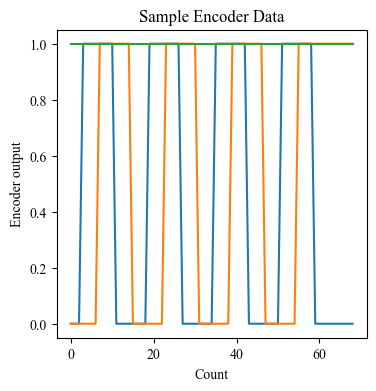

In [165]:
# a) Plotting sample data

SAMPLE_DATA_PATH = "sample_data.csv"

datas = np.array(pd.read_csv(SAMPLE_DATA_PATH)).transpose()

xs = np.arange(len(datas[0]))
ys1 = datas[0]
ys2 = datas[1]

fig1,ax1 = plt.subplots(figsize=(4,4))
ax1.set(
    title = "Sample Encoder Data",
    xlabel = "Count",
    ylabel = "Encoder output"
)

ax1.plot(xs, ys1)
ax1.plot(xs, ys2)
plt.show


# b) Counting encoder position

def position_counter(datas:np.array):
    count = 0
    last_value = 0
    for data in datas:
        for value in data:
            if value != last_value:
                count+=1
            last_value = value

    return count

print(position_counter(data))


# c) Distinguishing direction

def get_directions(datas:np.array):
    ys1 = datas[0]
    ys2 = datas[1]
    # Let 1 be CCW and 0 be CW
    directions = []
    for i in range(len(ys1)):
        direction = 1
        try:
            if ys1[i]>ys1[i-1]:
                if ys2[i] == 0:
                    direction = 1
                else:
                    direction = 0
            elif ys1[i]<ys1[i-1]:
                if ys2[i] == 0:
                    direction = 0
                else:
                    direction = 1
        except IndexError:
            direction=1
        directions.append(direction)
    return directions

ax1.plot(xs, get_directions(datas))


3. Explain what will happen to the encoder data as the motor changes speed. Sketch (by hand, tablet pen or photo of pen/pencil ok) how the encoder data plot would change when:
<br>
<br>a) The motor speeds up
<br>
<br>b) The motor slows down
<br>
<br>c) The motor stops


*Type your answer here*

*Include your sketch here*


4. The sample encoder data is not timestamped. Look up the speed range of your motor. How frequently would you need to sample the encoder measurements? Justify with an equation and a few sentences.


*Type your answer here*


5. The Arduino Uno microcontroller communicates with the computer through the serial port at a Baud rate of 9600.
<br>
<br>a) Theoretically, how many bits of information can be transferred each second?
<br>
<br>b) Assuming the information is sent as characters (one byte per chatacter), how many characters can be transferred each second?
<br>
<br>c) Assuming the motor is operating at full speed, can the serial port transfer information for both encoders at a fast enough rate?


*Type your answer here*


6. The Arduino UNO can perform on-board calculations at a much faster rate than the serial transfer. Attached is sample Arduino code. At its start, the code assigns dummy variable ''pos'' a value of zero. Every time Encoder A changes position from LOW to HIGH, the provided code increases variable ''pos'' by one. Every 1 s, the microcontroller transmits the value of ''pos'' over the serial port to the computer.
<br>
<br>a) This code does not capture the full resolution of the encoder. Edit the code to calculate the actual encoder position, in units of counts. Ensure that it is taking into account information from both encoders.
<br>
<br>b) Decide on a more appropriate transmission frequency than 1 Hz. Justify your choice of sampling rate.
<br>
<br>c) In the top left of the arduino IDE, press "Validate" to ensure your code will run smoothly.


*Type your answer here*


7. See the attached Python code to receive data sent by the microcontroller over the serial port. Edit the code to save the data in the location of your choice, keeping the appropriate number of significant figures that you choose. Edit your output in a format that is compatible with your python function in Q2. Ensure that your saved files have time-stamped encoder data. Running the python code from your command line, if all packages are installed, and it is not yet connected to an Arduino, it should return "Error during initialization : Microcontroller not found".
<br>
<br>Submit both your updated Python and Arduino codes to mycourses with your pre-lab.


8. The motor setup suggested requires a fancy power supply. Why can't you just plug the motor power cables into the Arduino directly? Explain using quantities in the motor's data sheet.


*Type your answer here*


9. Look at the motor driver data sheet. Find the data sheet of the H-bridge that's inside the motor driver. Using the H-bridge's data sheet, describe 3 factors that could damage the transistors in the half-bridge.


*Type your answer here*

## List of Parts

Please make sure that all of the following supplies are on your bench:

1. Power supply
2. Motor (Bilda 5202-0002-0188)
3. Motor Driver (H-039/BTS7960)
4. Arduino UNO
5. Breadboard with potentiometer
6. Lab desktop with python and Arduino functions open (serial_interface.py, motor_control.ino)
7. Assorted wires.
8. 500 g and 1000 g masses. 




## Lab Instructions

### Setting up logging and arduino code

Step 1: On the lab desktop, open Pycharm and navigate to the local copy of the lab folder **Note: downloads will appear in the H: drive**

Step 2: Open the serial_interface.py file

Step 3: Click Settings and type python interpreter in the search bar

Step 4: Click the + symbol to add a new package and search for pyserial

Step 5: Click install pyserial and wait until the package is installed

Step 6: Connect the USB-C cable to the arduino board and open the arduino IDE

Step 7: Compile and upload your arduino code to the board

Step 8: In Pycharm run the serial_interface.py file and ensure there are no errors. If done correctly, the terminal window should start printing out the data obtained from the arduino board.

Step 9: Terminate the python code by clicking on the red button in the **terminal window**

![Motor Circuit Setup](circuit_diagram_v1.svg "Motor Circuit Setup")

### Lab Instructions 

Step 1: Confirm the signal wires are properly connected, per the diagram. Confirm that Ch.A is connected to Digital Port 2, and Ch.B connected to Digital Port 3 on the Arduino.

Step 2: Turn on the power supply and ensure the voltage is set to 12V.

Step 3: Load and run your encoder measurement Arduino code to the microcontroller. The motor might start turning. If it does, turn the potentiometer to an approximately "centre" position, until the motor stops. Once your code is uploaded to the Arduino, close the Arduino IDE.

Step 4. Run your python logging code. Slowly turn the potentiometer to increase the speed. Controlling the potentiometer, make the pulley complete exactly one full turn (or as close as possible), then turn the potentiometer back to bring the pulley to rest. Stop the logging code (Ctrl+C on most terminals). 

Step 5. Confirm the location of the log file. Be sure to clearly indicate which folder is associated with which step of your lab (taking personal notes, changing file or folder names). This is good practice after every time you save a file in this lab. 

Step 6: Run the python logging script again. This time, turn the potentiometer to a few different positions, for a reasonable amount of time, until you have found the highest clockwise and counter-clockwise speeds. Ensure any parts attached to the pulley and fishing line do not hit the table or floor. Throughout this run, note any changes in voltage or current from the power supply as the potentiometer changes (qualitatively). When the potentiometer is set to the highest counter-clockwise speed, turn off the power supply then stop the code to save your results.

Step 7: With the power supply turned off, if it is not already attached, connect the carabiner to the fishing line. Set the carabiner close to the ground, and ensure the fishing line is wound around the pulley. Ensure the potentiometer is at the position to set the highest counter-clockwise speed. 

Step 8: Start your python logging script, then turn the power supply on, to turn the pulley. After a few seconds, when the carabiner is nearing the pulley, turn the potentiometer to a neutral position to stop the pulley, then turn the power supply off and stop the code. Throughout this run, have a labmate note, approximately, the voltage and current drawn from the power supply.

Step 9: Re-set the pulley position to slightly above the floor. This can be done by turning the power supply on with the potentiometer in the opposite direction. Set the potentiometer to a neutral position, with the motor not turning, then turn the power supply off. Once the power is turned off, re-set the potentiometer to the highest counter-clockwise speed.

Step 10: Attach the 500g mass to the carabiner. Repeat Steps 10 and 11. For safety, ensure you stop the carabiner before it hits the pulley. Ensure a labmate records any differences in voltage or current with the heaier payload.

Step 11: Replace the 500 g mass with the 1000 g mass. Repeat Steps 10 and 11. For safety, ensure you stop the carabiner before it hits the pulley. Ensure a labmate records any differences in voltage or current with the heaier payload.

Step 12: Remove the mass from the carabiner, ensure the power supply is turned off

Step 13: In the Arduino IDE open a new file and upload it to the arduino board. After the code is uploaded disconnect the USB-C cable from the board.

## Lab Report [90 Points]

1. Look at the circuit diagram of the motor driver. Describe qualitatively what role the MOSFETS have.

*Type your answer here*


2. a) Look at the circuit diagram of the potentiometer. Calculate the voltage sent to the microcontroller; give your answer as a formula.
<br>
<br>b) From reviewing the Arduino code, briefly explain how the microcontroller converts a signal from the potentiometer into a signal to the motor controller.

In [166]:
## Display your functions and calculations here
## Use print() to display your final answer

*Type your answer here*

3. Plot your data from Step 6; use axis titles and units of counts. Explain whether your Arduino code was capturing the full resolution of the encoder for one full rotation, or a multiple of its values.

In [167]:
## Display your graphs here

*Type your answer here*

4. Plot your data from Step 8. Using this data, calculate the rotational speed of the motor across the test, in degrees/sec. Show your result on a graph.

In [168]:
## Display your graphs, functions and calculations here
## Use print() to display your final answer

5. Calculate the torque applied to the motor in Steps 10-13. Note that the pulley has a diameter of 200 mm, and the carabiner has a mass of 100 g. 

In [169]:
## Display your functions and calculations here
## Use print() to display your final answer

6. Using your encoder data from steps 10-13, calculate the speed (in rpm) of the motor in for each different weight; print your results. Smoothing the data with the algorithm of your choice is strongly recommended. Discuss how you smoothed your data, and why. 

In [170]:
## Display your functions and calculations here
## Use print() to display your final answer

7. Look at the documentation of the motor. Explain what happened when you attached a heavier mass to the motor (1000 g vs 0 g). What would happen if the mass was 5000 g? 50 kg? What attached mass would be needed to cause complications?

*Type your answer here*

8. Detailed torque-speed data is provided in an auxiliary file. Using the torques and angular speeds calculated in steps 10-13, create a plot that overlays your measurements with the provided data. Explain any agreement and/or discrepancies.

In [171]:
## Display your graphs, functions and calculations here
## Use print() to display your final answer

*Type your answer here*

9. Check the time intervals between your recorded data points. Are they consistent? Compare the actual sampling frequency to the intended frequency, and discuss any discrepancies.

*Type your answer here*

10. Qualitatively, did you notice any changes in voltage or current as the potentiometer reading changed? Did any changes occur as the mass of the payload increased? Discuss these results and how they relate to the motor's documentation.

*Type your answer here*

Bonus question: Consider a scenario where this motor has to drive a factory conveyor belt with 50lbs on it. Assuming a friction coefficient of 0.3, what is the maximum radius of belt rollers that would enable this motor to drive it?

In [172]:
## Display your functions and calculations here
## Use print() to display your final answer

## References [5 points]

Please share any resources that you used (ex: Stack Overflow, official documentation, myCourses forum, etc) and the names of anyone you worked with. For resources, provide a URL where necessary. For collaborators, note which sections were done collaboratively; failure to do so may result in a grade of 0/5 for references.

*Type your references here. For full marks, attribute them to specific sections in your report using a numbering system.*